In [36]:
#General import
from sklearn import metrics
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy

#Qiskit import
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap, ZFeatureMap
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_algorithms.utils import algorithm_globals
from qiskit.circuit.library import XGate, SXGate, RZGate, CXGate
from qiskit.circuit.gate import Gate
algorithm_globals.random_seed = 13


#sklearn import
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.svm import SVC

In [67]:
class Individual():
    
    def __init__(
        self,
        numberOfGenes: int,
        numberOfFeatures: int,
        numberOfQubits: int,
        gates = [Gate]
    ) -> None:
    
        self._numberOfFeatures = numberOfFeatures
        self._numberOfGenes = numberOfGenes
        self._numberOfQubits = numberOfQubits
        self._genotype =  [[None, None, None, None] for _ in range(numberOfGenes)]
        self._gates = gates
        
        
    def generateFirstIndividual(
        self
    ) -> None:
        
        featurePositions = []
        
        while len(featurePositions) < self._numberOfFeatures:
            position = random.randint(0, self._numberOfGenes-1)
            if position not in featurePositions:
                featurePositions.append(position)
    
        feature = 0
        for gene in featurePositions:
            qubit = random.randint(0, self._numberOfQubits-1)
            self._genotype[gene][0] = RZGate
            self._genotype[gene][1] = qubit
            self._genotype[gene][2] = None
            self._genotype[gene][3] = feature
            feature = feature + 1    
            
        for gene in [i for i in range(self._numberOfGenes) if i not in featurePositions]:
            
            gate = random.choice(self._gates)
            
            self._genotype[gene][0] = gate
            
            if gate == RZGate:
                
                qubit = random.randint(0, self._numberOfQubits-1)
                feature = random.randint(0, self._numberOfFeatures-1)
                self._genotype[gene][1] = qubit
                self._genotype[gene][2] = None
                self._genotype[gene][3] = feature
                
            elif gate == CXGate:
                
                control_qubit = random.randint(0, self._numberOfQubits-1)
                target_qubit = random.randint(0, self._numberOfQubits-1)
                while target_qubit == control_qubit:
                    target_qubit = random.randint(0, self._numberOfQubits-1)
                    
                self._genotype[gene][1] = target_qubit
                self._genotype[gene][2] = control_qubit
                self._genotype[gene][3] = None
                
            else:
                
                qubit = random.randint(0, self._numberOfQubits-1)
                self._genotype[gene][1] = qubit
                self._genotype[gene][2] = None
                self._genotype[gene][3] = None


    @property
    def numberOfFeatures(self) -> int:
        return self._numberOfFeatures
    
    @property
    def numberOfQubits(self) -> int:
        return self._numberOfQubits
    
    @property
    def numberOfGenes(self) -> int:
        return self._numberOfGenes
    
    @property
    def gates(self) -> list[Gate]:
        return self._gates
    
    @numberOfFeatures.setter
    def numberOfFeatures(self, value: int):
        self._numberOfFeatures = value

    @numberOfQubits.setter
    def numberOfQubits(self, value: int):
        self._numberOfQubits = value
                            
    @numberOfGenes.setter
    def numberOfGenes(self, value: int):
        self._numberOfGenes = value

    @gates.setter
    def gates(self, value: list[Gate]):
        self._gates = value

    def getFenotype(
        self
    ) -> QuantumCircuit:
        
        trainingParams = ParameterVector('x', self._numberOfFeatures)
        
        fenotype = QuantumCircuit(self._numberOfQubits)
        
        for gene in range(self._numberOfGenes):
                
                gate = self._genotype[gene][0]

                if gate == RZGate:
                    fenotype.append(gate(trainingParams[self._genotype[gene][3]]), [self._genotype[gene][1]])
                    
                elif gate == CXGate:
                    fenotype.append(gate(), [self._genotype[gene][2], self._genotype[gene][1]])
                    
                else:
                    fenotype.append(gate(), [self._genotype[gene][1]])        

        return fenotype

        
    def mutate(
        self, 
        probability: float = 0.5
    ) -> None:
        
        if random.random() < probability: 
            
            gene = random.randint(0, self._numberOfGenes-1)
            
            self._genotype[gene] = [None, None, None, None]
            
            gate = random.choice(self._gates)
        
            self._genotype[gene][0] = gate
            
            if gate == RZGate:
                
                qubit = random.randint(0, self._numberOfQubits-1)
                feature = random.randint(0, self._numberOfFeatures-1)
                self._genotype[gene][1] = qubit
                self._genotype[gene][2] = None
                self._genotype[gene][3] = feature
                
            elif gate == CXGate:
                
                control_qubit = random.randint(0, self._numberOfQubits-1)
                target_qubit = random.randint(0, self._numberOfQubits-1)
                while target_qubit == control_qubit:
                    target_qubit = random.randint(0, self._numberOfQubits-1)
                    
                self._genotype[gene][1] = target_qubit
                self._genotype[gene][2] = control_qubit
                self._genotype[gene][3] = None
                
            else:
                
                qubit = random.randint(0, self._numberOfQubits-1)
                self._genotype[gene][1] = qubit
                self._genotype[gene][2] = None
                self._genotype[gene][3] = None



                
def crossover(
    parent1: Individual,
    parent2: Individual
    ) -> tuple[Individual, Individual]:
        
        child1 = Individual(
            numberOfFeatures=parent1.numberOfFeatures, 
            numberOfGenes=parent1.NumberOfGenes, 
            numberOfQubits=parent1.NumberOfQubits, 
            gates=parent1.gates
        )
        child2 = Individual(
            numberOfFeatures=parent1.numberOfFeatures, 
            numberOfGenes=parent1.NumberOfGenes, 
            numberOfQubits=parent1.NumberOfQubits, 
            gates=parent1.gates
        )

        
        

In [66]:
gates = [XGate, SXGate, RZGate, CXGate]
first = Individual(numberOfFeatures=2, numberOfGenes=5, numberOfQubits=4, gates=gates)
first.generateFirstIndividual()
first.printGenotype()
print(circuit_drawer(first.getFenotype()))


Gene 1:
[<class 'qiskit.circuit.library.standard_gates.rz.RZGate'>, 1, None, 0]
Gene 2:
[<class 'qiskit.circuit.library.standard_gates.rz.RZGate'>, 1, None, 0]
Gene 3:
[<class 'qiskit.circuit.library.standard_gates.rz.RZGate'>, 3, None, 1]
Gene 4:
[<class 'qiskit.circuit.library.standard_gates.x.CXGate'>, 1, 3, None]
Gene 5:
[<class 'qiskit.circuit.library.standard_gates.x.XGate'>, 2, None, None]
                                  
q_0: ─────────────────────────────
     ┌──────────┐┌──────────┐┌───┐
q_1: ┤ Rz(x[0]) ├┤ Rz(x[0]) ├┤ X ├
     └──┬───┬───┘└──────────┘└─┬─┘
q_2: ───┤ X ├──────────────────┼──
     ┌──┴───┴───┐              │  
q_3: ┤ Rz(x[1]) ├──────────────■──
     └──────────┘                 


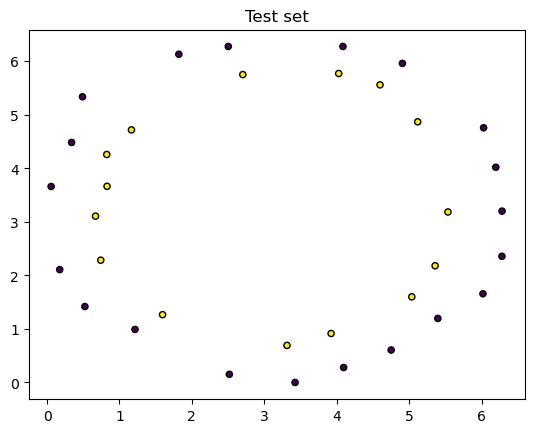

In [39]:
X, y = make_circles(n_samples=50, factor=0.8, noise=0.025, random_state=42)
X = MinMaxScaler(feature_range=(0, 2*np.pi)).fit_transform(X) #seems to have better results if compatible with the rotation encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13) 

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('Test set')
plt.show()

In [40]:
maximumGenerations = 15
targetFitness = 0.95
numberOfGenes = 4
numberOfQubits = 2
gates = [XGate, SXGate, RZGate, CXGate]
k = 15

numberOfGenerations = 0
bestIndividual = Individual(numberOfFeatures = X_train.shape[1], numberOfGenes = numberOfGenes, numberOfQubits = X_train.shape[1], gates = gates)
bestIndividual.generateFirstIndividual()
feature_map = bestIndividual.getFenotype()
kernel = FidelityQuantumKernel(feature_map=feature_map)
svc = SVC(kernel=kernel.evaluate)
svc.fit(X_train, y_train)
bestFitness = svc.score(X_test, y_test)
bestSVC = svc
print(f'Generation number {numberOfGenerations}')
numberOfGenerations = numberOfGenerations + 1
print(f'Best fitness: {bestFitness}')
print(circuit_drawer(bestIndividual.getFenotype()))
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))
Z = bestSVC.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='binary')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
plt.xlabel(f'Feature 1')
plt.ylabel(f'Feature 2')
plt.title(f'Test set, generation {numberOfGenerations}')
plt.show()
print('-----------------------------------------')

while bestFitness < targetFitness and numberOfGenerations < maximumGenerations: 
    
    currentGeneration = []
    
    for i in range(k):
        currentGeneration.append(None)
        currentGeneration[i] = deepcopy(bestIndividual)

    for i in range(k):
        currentGeneration[i].mutate()
        feature_map = currentGeneration[i].getFenotype()
        kernel = FidelityQuantumKernel(feature_map=feature_map)
        svc = SVC(kernel=kernel.evaluate)
        svc.fit(X_train, y_train)
        fitness = svc.score(X_test, y_test)
        
        if fitness > bestFitness:
            bestIndividual = deepcopy(currentGeneration[i])
            bestFitness = fitness
            bestSVC = svc
    
    print(f'Generation number {numberOfGenerations}')
    numberOfGenerations = numberOfGenerations + 1
    print(f'Best fitness: {bestFitness}')
    print('Best feature map:')
    print(circuit_drawer(bestIndividual.getFenotype()))
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))
    Z = bestSVC.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='binary')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=20, edgecolor='k')
    plt.xlabel(f'Feature 1')
    plt.ylabel(f'Feature 2')
    plt.title(f'Test set, generation {numberOfGenerations}')
    plt.show()
    print('-----------------------------------------')
    
        

Generation number 0
Best fitness: 0.3333333333333333
     ┌──────────┐┌──────────┐
q_0: ┤ Rz(x[1]) ├┤ Rz(x[1]) ├
     ├──────────┤└──┬────┬──┘
q_1: ┤ Rz(x[0]) ├───┤ √X ├───
     └──────────┘   └────┘   


KeyboardInterrupt: 